In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df =pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### Total number of funding in each year and plot a graph between year vs number of fundings 

In [24]:
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/

In [25]:
year = df['Date'].str.split('/',expand=True)[2]

In [39]:
fundings = year.value_counts()

In [40]:
fundings

2016    993
2015    936
2017    443
Name: 2, dtype: int64

In [26]:
year.unique()

array(['2017', '2016', '2015'], dtype=object)

In [27]:
year.shape

(2372,)

In [32]:
fundings.sort_index(inplace=True)
fundings.index

Index(['2015', '2016', '2017'], dtype='object')

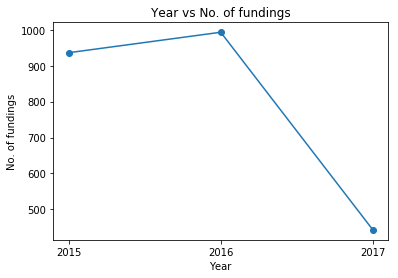

2015 936
2016 993
2017 443


In [36]:
x = fundings.index
y = fundings

plt.plot(x,y,marker='o')
plt.xlabel('Year')
plt.ylabel('No. of fundings')
plt.title('Year vs No. of fundings')
plt.show()

for i in range(len(x)):
    print(x[i],y[i])

### Top 10 Indian cities which have most number of startups and plot them. 

In [88]:
import pandas as pd
import numpy as np

df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

city_number=df_start['CityLocation'].value_counts()[0:10]
city=city_number.index
numCity=city_number.values
for i in range(len(city)):
    print(city[i],numCity[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


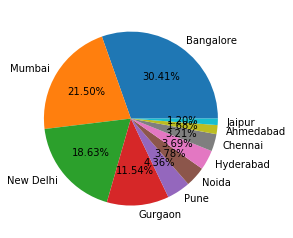

In [105]:
x = city_number.index
y = city_number
plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()

### Top 10 Indian cities with most amount of fundings received and the percentage of funding each city has got (among top 10 Indian cities only). 

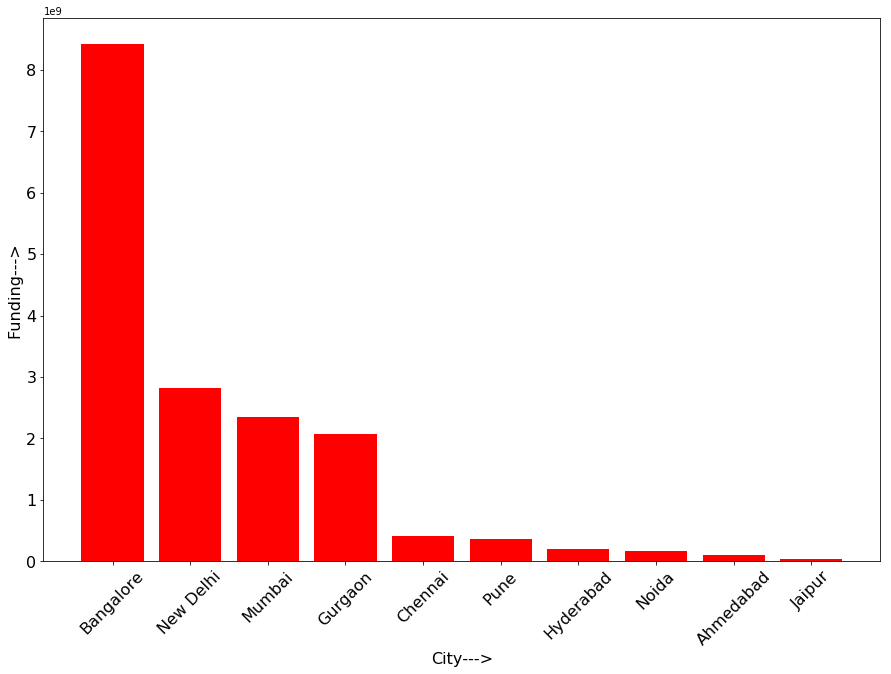

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [114]:
import pandas as pd

data=pd.read_csv('startup_funding.csv')
df=data.copy()

df.drop(df.index[df.CityLocation.isnull()], inplace=True)
df.reset_index(inplace=True, drop=True)

df.loc[df['AmountInUSD'].isnull(), 'AmountInUSD']='0'
df.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Delhi', 'CityLocation']='New Delhi'

city=[]
amount=[]

for i in df.CityLocation:
    city.append(i)

for i in df.AmountInUSD:
    amount.append(i)

for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))
    city[i]=city[i].split('/')[0].strip()

np_amount=np.array(amount, dtype='int64')
np_city=np.array(city)



dic=dict()
for i in range(len(np_city)):
    if np_city[i] in dic:
        dic[np_city[i]]+=np_amount[i]
    else:
        dic[np_city[i]]=np_amount[i]

xaxis=list(dic.keys())
yaxis=list(dic.values())

np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]


plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='red')
plt.xticks(rotation=45, size=16)
plt.yticks(size=16)
plt.xlabel('City--->', size=16)
plt.ylabel('Funding--->', size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis), '.2f'))

### Investments type by funding

In [115]:
df=pd.read_csv('startup_funding.csv')

In [116]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [118]:
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [145]:
df.InvestmentType.loc[df.InvestmentType=='Crowd funding']='Crowd Funding'
df.InvestmentType.loc[df.InvestmentType=='PrivateEquity']='Private Equity'
df.InvestmentType.loc[df.InvestmentType=='SeedFunding']='Seed Funding'
df.AmountInUSD.fillna('0', inplace=True)
df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df["AmountInUSD"] = pd.to_numeric(df["AmountInUSD"])


/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [153]:
seed_fund = int(df[df['InvestmentType']=='Seed Funding'].AmountInUSD.sum())


In [154]:
private_fund = int(df[df['InvestmentType']=='Private Equity'].AmountInUSD.sum())


In [158]:
crowd_fund = int(df[df['InvestmentType']=='Crowd Funding'].AmountInUSD.sum())


155768

In [159]:
debt_fund =  int(df[df['InvestmentType']=='Debt Funding'].AmountInUSD.sum())


7800000

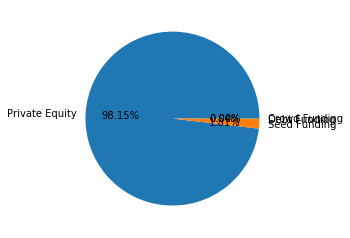

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [162]:
x=['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
y=[private_fund, seed_fund, debt_fund, crowd_fund]


plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()

for i in range(len(x)):
    print(x[i],format((y[i]*100)/sum(y), '.2f'))

### Top 5 industries and percentage of the total amount funded to that industry.

/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


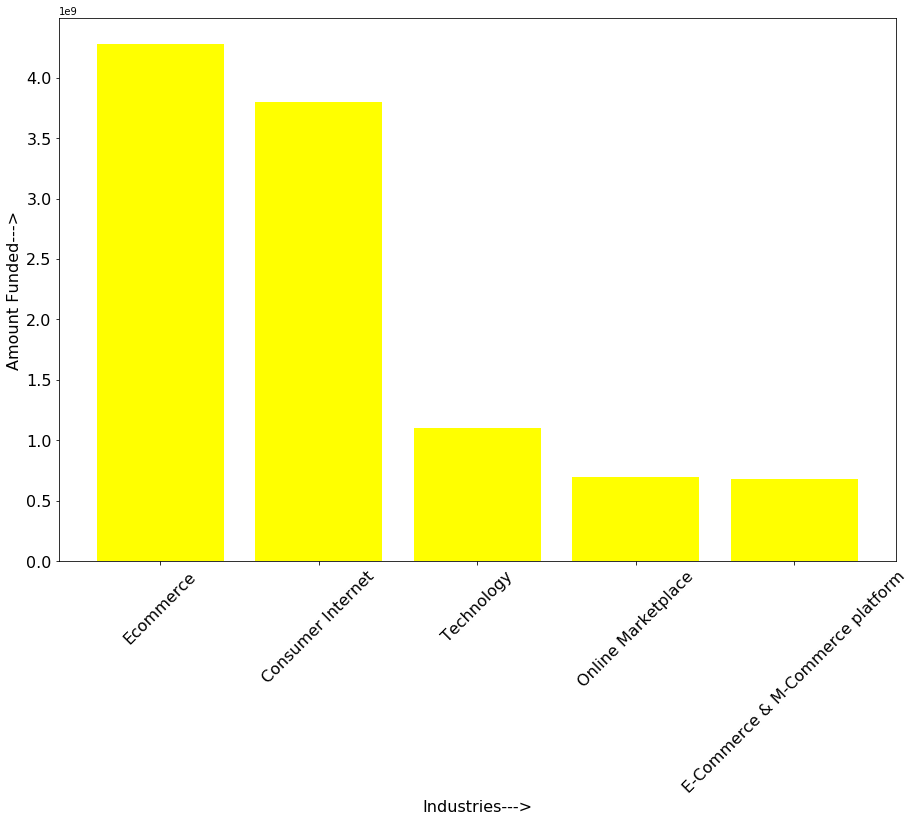

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [185]:
data=pd.read_csv('startup_funding.csv')
df=data.copy()

df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)

np_industry=np.array(df.IndustryVertical)
np_amount=np.array(df.AmountInUSD)
np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')

dic=dict()
for i in range(len(np_amount)):
    if np_industry[i] in dic.keys():
        dic[np_industry[i]]+=np_amount[i]
    else:
        dic[np_industry[i]]=np_amount[i]
xaxis=[]
yaxis=[]

for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='yellow')
plt.xticks(rotation=45, size=16)
plt.xlabel('Industries--->', size=16)
plt.ylabel('Amount Funded--->', size=16)
plt.yticks(size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis) , '.2f'))

### Startups with most amount of total funding. 

In [186]:
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'

np_amount=np.array(df.AmountInUSD)
np_startup=np.array(df.StartupName)

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')
for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'
dic=dict()
for i in range(len(np_amount)):
    if np_startup[i] in dic.keys():
        dic[np_startup[i]]+=np_amount[i]
    else:
        dic[np_startup[i]]=np_amount[i]
        
xaxis=[]
yaxis=[]
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

for i in np_xaxis:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


### Top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times. 

In [196]:
data = pd.read_csv('startup_funding.csv')
df = data.copy()
np_startup = np.array(df.StartupName)

for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i] = 'Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i] or 'OYO Rooms' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'    
        
dic = dict()  
for i in np_startup:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
        
x=[]
y=[]

for i in dic.keys():
    x.append(i)
    y.append(dic[i])
    
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)
np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

for i in range(len(np_x)):
    print(np_x[i], np_y[i])

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


### Find the Investors who have invested maximum number of times. 

In [202]:
import csv
import numpy as np
with open('startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    investors=[]
    
    for row in file_data:
        if not('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investors.append(i.strip())
                
    dic=dict()
    for i in investors:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    np_y=np_y[::-1]
    np_x=np_x[::-1]
    print(np_x[0], np_y[0])            

Sequoia Capital 64
